# House Hold Power Consumption Forecasting

Given the rise of smart electricity meters and the adoption of electricity generation technology like solar pannels, there is a wealth of electricity usage data is available. This data represents a multivariate time series of power-related variables that in turn could be used to model and even forecast future electricity consumption.

#### Problem Framing:

We will use the data to explore a very specific qyuestion: _Given recent poer consumption, what is the expected power consumption for the week ahead?_. This requires that a presdictive model forecast the total active power for each day over the next seven days. This framing of the problem is related to multi-step ime series forecasting  problem.

A model of this type could be helpful within the household in planning expenditures. It could also be helpful on the supply side for planning electricity demandfor a specific household.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
# load data
dataset = pd.read_csv('household_power_consumption.txt',sep=";",header=0,low_memory=False,infer_datetime_format=True, parse_dates={'datetime':[0,1]},index_col=['datetime'])

In [3]:
dataset.shape

(2075259, 7)

In [4]:
# looking for missing values
dataset.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
# Handle Missing values
dataset.replace("?",np.nan,inplace=True)

In [6]:
# 'Sub_metering_3' values of other features were "?", where "Sub_metering_3"=='NaN'
dataset.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
# create a column that contains remainder of sub-metering
values = dataset.values.astype('float32')
values

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]],
      dtype=float32)

In [8]:
dataset['Sub_metering_4'] = (values[:,0]*1000/6)-(values[:,4]+values[:,5]+values[:,6])

In [9]:
dataset.to_csv('household_power_consumption.csv')

In [10]:
# load the new dataset
dataset = pd.read_csv('household_power_consumption.csv',header=0,infer_datetime_format=True,parse_dates=['datetime'],index_col=['datetime'])

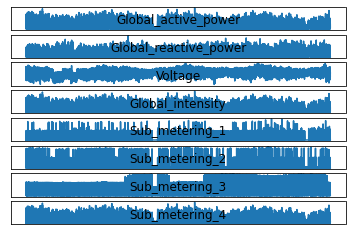

In [11]:
# lineplot for each variable
pyplot.figure()

for i in range(len(dataset.columns)):
    pyplot.subplot(len(dataset.columns),1,i+1)
    name = dataset.columns[i]
    pyplot.plot(dataset[name])
    pyplot.title(name,y=0)
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()
    

yearly lineplot for power usage dataset 

In [12]:
years = ['2007','2008','2009','2010']

<ipython-input-13-24e0021ad215>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[year]


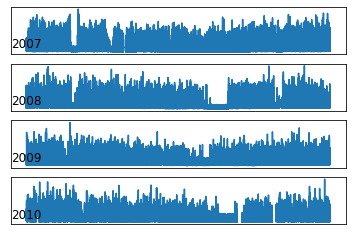

In [13]:
for i in range(len(years)):
    ax = pyplot.subplot(len(years),1,i+1)
    year = str(years[i])
    result = dataset[year]
    pyplot.plot(result['Global_active_power'])
    pyplot.title(year,y=0,loc="left")
    pyplot.xticks([])
    pyplot.yticks([])

#### monthly line plot for power usage dataset
*Below drawn plot is for FY _2007_ only

<ipython-input-14-c30d9f18ab07>:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[month]


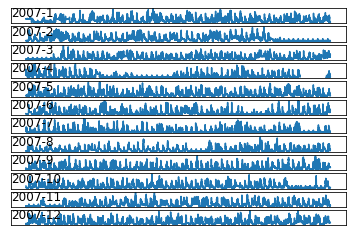

In [14]:
months = [x for x in range(1,13)]
for i in range(len(months)):
    ax = pyplot.subplot(len(months),1,i+1)
    month = '2007-'+str(months[i])
    result = dataset[month]
    pyplot.plot(result['Global_active_power'])
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.title(month,loc="left",y=0)

**Interpretation:** here we can see some straches in months like April,Auguest which shows vacation period, when house is umoccupied.

**Line plot for daily power comsumption**

*Below drawn plot is for FY 2007-01 only

<ipython-input-15-0e571829491c>:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[day]


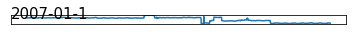

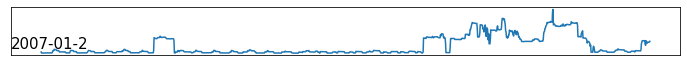

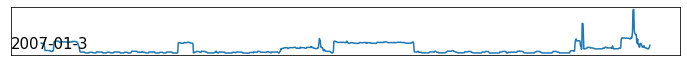

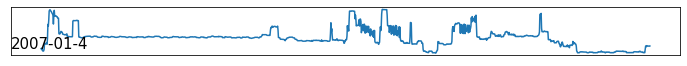

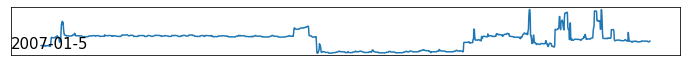

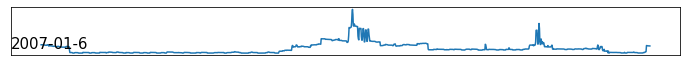

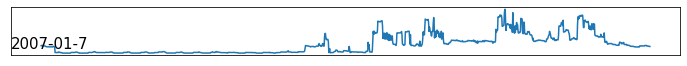

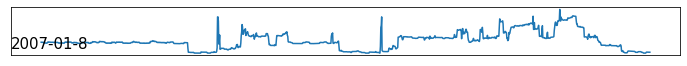

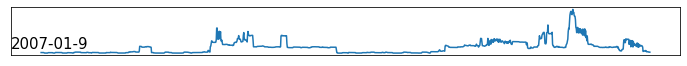

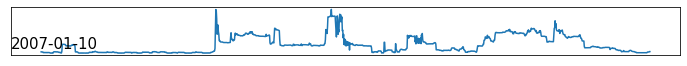

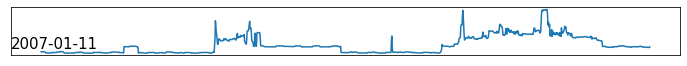

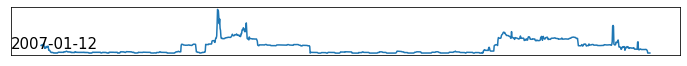

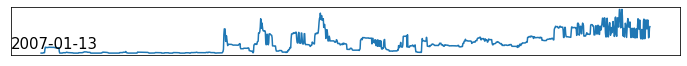

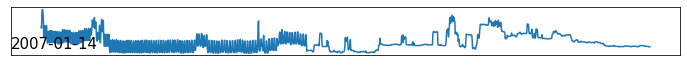

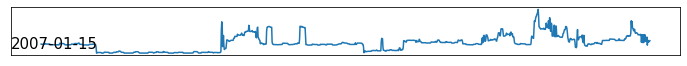

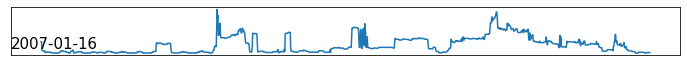

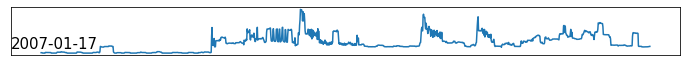

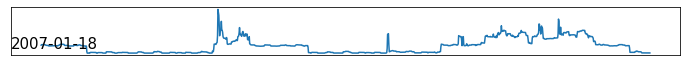

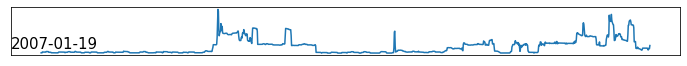

<Figure size 864x1440 with 0 Axes>

In [15]:
days = [x for x in range(1,20)]
for i in range(len(days)):
    ax = pyplot.subplot(len(days),1,i+1)
    day = "2007-01-"+str(days[i])
    result = dataset[day]
    pyplot.plot(result['Global_active_power'])
    pyplot.title(day,y=0,loc="left",size=15)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.figure(figsize=(12,20))

**Interpretation:** Here, for many days consumption starts in early morning, around 6-7 AM. Some days it shows drop in consumption, that is obvious because occupents are not present in house. Some strong overnight consumption is also observed, that is in northen hemisphere "January", due to heating system being used.

## Data distribution:

create histogram for each variable

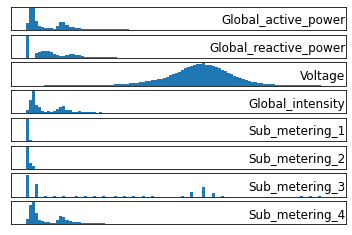

In [16]:
for i in range(len(dataset.columns)):
    #create subplot
    pyplot.subplot(len(dataset.columns),1,i+1)
    
    #get variable name
    name = dataset.columns[i]
    
    #create histogram
    dataset[name].hist(bins=100)
    
    pyplot.title(name,y=0,loc='right')
    
    pyplot.yticks([])
    pyplot.xticks([])

The distribution of active power consumption loks bi-model, meaning it looks like it has two mean group of observations. 

estimate it by taking 4 full year of data of active_power_consumption.

<ipython-input-17-23bdcdf4e5e6>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[str(year)]


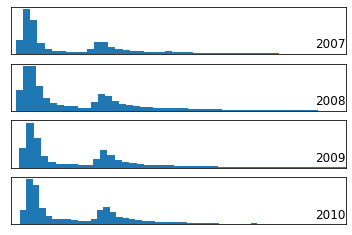

In [17]:
years=['2007','2008','2009','2010']
for i in range(len(years)):
    ax = pyplot.subplot(len(years),1,i+1)
    
    #determine the year to plot.
    year = years[i]
    
    result = dataset[str(year)]
    
    result['Global_active_power'].hist(bins=100)
    
    ax.set_xlim(0,5)
    
    pyplot.title(str(year),y=0,loc="right")
    
    pyplot.xticks([])
    pyplot.yticks([])
    

it is possible that identified group may vary over the seasons of the year. We can investigate this by looking at the distribution for the active_power for each month in a year.

<ipython-input-18-02abdfe6b0c1>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[month]


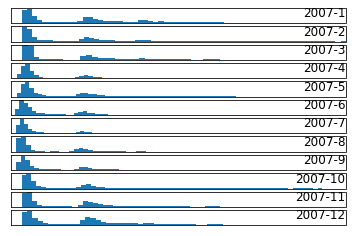

In [18]:
months = [x for x in range(1,13)]
for i in range(len(months)):
    #creating subplot
    ax = pyplot.subplot(len(months),1,i+1)
    
    month = '2007-'+str(months[i])
    
    result = dataset[month]
    
    result['Global_active_power'].hist(bins=100)
    
    ax.set_xlim(0,6)
    pyplot.title(month,y=0,loc='right')
    
    pyplot.xticks([])
    pyplot.yticks([])

**Interpretation:** we can see that the axes for the plots appear to align , and we can see that the peak are shifted down in the warmer northen hemisphere months and shifted up for the colder months. We can also see a thicker or more prominent tail towards larger kilowatts values for the colder months i.e from December to March

# Naive Model For Multistep Energy Usage Forecasting

In [19]:
def fill_missing(values):
    one_day = 60*24
    
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if isnan(values[row,col]):
                values[row,col] = values[row-one_day,col]

In [20]:
# downsample the per-minute observations of power consumption to daily totals
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()

# save it to seperate csv file
daily_data.to_csv("household_power_consumption_days.csv")
# daily_data

**Walk-forward validation**

model will be evaluated usign scheme called walk-forward validation.this is where a model is required to make a one week prediction, then the actual data for that week is made available to the model so that it can be used as the basis for making a prediction on the subsequent week.

| Input | Predict |
| :--- | --- | 
| [week1] | week2 |
|[week1]+[week2] | week3
|[week1]+[week2]+[week3] | week4

### Developing Naive forecasting model

Naive forecasting model is of three types: 

1. Daily Persistance Forecast.
2. Weekly Persistance Forecast.
3. Weekly one-year-ago Forecast.

In [21]:
#function to evaluate one or more weekly firecast against exected vals.
def evaluate_forecasts(actual,predicted):
    scores = list()
#     print("shape of actual: ",actual.shape[1])
    
    #calculate RMSE score for each day
    for i in range(actual.shape[1]):   #loop will iterate 7 times
        #cal. MSE
        mse = mean_squared_error(actual[:,i],predicted[:,i])
        
        #calculate rmse
        rmse = sqrt(mse)
        
        #store
        scores.append(rmse)
        
    #calculate overall RMSE
    s=0
    for row in range(actual.shape[0]): #will execute 46 times
        for col in range(actual.shape[1]): #will execute 7 times
            s += (actual[row,col] - predicted[row,col])**2
    score = sqrt(s/(actual.shape[0]*actual.shape[1]))
    return score, scores

In [22]:
def split_dataset(data):
    #split into standard weeks
    train,test = data[1:-328],data[-328:-6]

    #resturcture into windows of weekly data
    train = np.array(np.split(train,len(train)/7))
    test = np.array(np.split(test,len(test)/7))
    return train,test

In [23]:
#1 daily persistance forecast model
def daily_persistance(history):
    
    #get the data for the prior week
    last_week = history[-1]
#     print("last_week: ",last_week)
    
    #get the total active power for the last day
    value = last_week[-1,0]
    
    #prepare 7 day forecast
    forecast = [value for _ in range(7)]
#     print("Forecast: ",forecast)
    return forecast

In [24]:
def weekly_persistence(history):
    last_week = history[-1]
    
    #get the data for the prior week
    return last_week[:,0]

def weekly_one_year_ago_persistence(history):
    
    #get the data for the prior week
    last_week = history[-52]()
    return last_week[:,0]

In [25]:
def summerize_scores(name,score,scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name,score,s_scores))

In [45]:
def evaluate_model(model_func,train,test):
    #history is a list of weekly data
    history = [x for x in train]
#     print("history: ",history)
    
    #walk-foreward validation over each week
    predictions = list()
    for i in range(len(test)):
        #predict the week
        yhat_sequence = model_func(history)
#         print("yhat_seuence",yhat_sequence)
#         print("\n-------------------------------------------------\n")
                   
        #store the predictions
        predictions.append(yhat_sequence)
        
        #get real observation and add to history for predictiong the next week
        print("i= ",i)
        history.append(test[i,:]) #appending ith row of test to train
#         print("history after append: ",history)
#     print("predictions",predictions)
    predictions = np.array(predictions)
#     print("predictions",predictions)
                   
    #ecvaluate predictions days for each week
#     print("text: ",test[:,:,0])
#     print("predictions: ",predictions)
    score, scores = evaluate_forecasts(test[:,:,0],predictions)
    return score,scores

In [27]:
#validate train data
dataset = pd.read_csv("household_power_consumption_days.csv",header=0,infer_datetime_format=True,parse_dates=['datetime'],index_col=['datetime'])
train,test = split_dataset(dataset.values)

yhat_seuence [1308.8359999999998, 1308.8359999999998, 1308.8359999999998, 1308.8359999999998, 1308.8359999999998, 1308.8359999999998, 1308.8359999999998]

-------------------------------------------------

i=  0
yhat_seuence [2336.9000000000037, 2336.9000000000037, 2336.9000000000037, 2336.9000000000037, 2336.9000000000037, 2336.9000000000037, 2336.9000000000037]

-------------------------------------------------

i=  1
yhat_seuence [2150.112000000001, 2150.112000000001, 2150.112000000001, 2150.112000000001, 2150.112000000001, 2150.112000000001, 2150.112000000001]

-------------------------------------------------

i=  2
yhat_seuence [2608.51, 2608.51, 2608.51, 2608.51, 2608.51, 2608.51, 2608.51]

-------------------------------------------------

i=  3
yhat_seuence [2842.7280000000005, 2842.7280000000005, 2842.7280000000005, 2842.7280000000005, 2842.7280000000005, 2842.7280000000005, 2842.7280000000005]

-------------------------------------------------

i=  4
yhat_seuence [2712.98600

yhat_seuence [2195.452 2094.098 2047.968 2451.11  2211.892 1224.252 1308.836]

-------------------------------------------------

i=  0
yhat_seuence [2083.454 1604.132 2219.78  1777.18  1769.442 1797.208 2336.9  ]

-------------------------------------------------

i=  1
yhat_seuence [2508.466 1518.684 1282.538    0.     618.488 2196.76  2150.112]

-------------------------------------------------

i=  2
yhat_seuence [1906.556 1881.098 2433.508 2351.728 2137.856 1790.626 2608.51 ]

-------------------------------------------------

i=  3
yhat_seuence [2269.42  1930.51  2067.564 2760.902 2110.234 2092.99  2842.728]

-------------------------------------------------

i=  4
yhat_seuence [1799.196 1693.778 2157.432 2903.014 2316.27  2098.892 2712.986]

-------------------------------------------------

i=  5
yhat_seuence [1625.708 2582.238 2420.932 1944.542 1369.768 1892.998 2351.556]

-------------------------------------------------

i=  6
yhat_seuence [1686.698 2097.132 1797.756 2054.56

score:  605.5226375650433
scores [704.5795143046233, 611.6646033507046, 496.3401222669795, 646.9723276643222, 550.0520285816452, 446.8888782005031, 727.2167214212664]
weekly: [605.523] 704.6, 611.7, 496.3, 647.0, 550.1, 446.9, 727.2


TypeError: 'numpy.ndarray' object is not callable

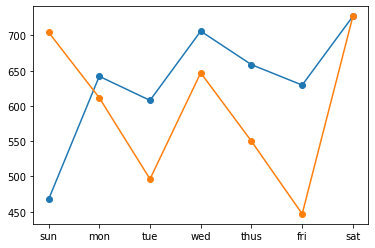

In [28]:
#define the names and functions for the model, we wish to evaluate
model=dict()

model['daily'] = daily_persistance
model['weekly'] = weekly_persistence
model['week-oys'] = weekly_one_year_ago_persistence

#evaluate each model
days = ['sun','mon','tue','wed','thus','fri','sat']

for name,func in model.items():
    
    #evaluate and get scores
    score, scores = evaluate_model(func,train,test)
#     print("score: ",score)
#     print("scores",scores)
    
    #summerize scores
    summerize_scores(name,score,scores)
    
    #plot scores
    pyplot.plot(days,scores,marker="o",label=name)
pyplot.legend()


As we can see that weekly strategy performs bettern then daily, and weekly-one_year performs bit better than weekly

# ARIMA Model For Energy Usage Forecasting

In [46]:
# convert window of weekly multivariate data into a series of total power
def to_series(data):
    #extract "total_power" from each week
    series = [week[:,0] for week in data]
    
    #flatten into a single series
    series = np.array(series).flatten()
    
    return series

In [47]:
from statsmodels.tsa.arima_model import ARIMA

def arima_forecast(history):
    #convert history into univriate series
    series = to_series(history)
    
    #defime the model
    model  = ARIMA(series,order=(7,0,0))
    
    #fit the model
    model_fit = model.fit(disp=False)
    
    yhat = model_fit.predict(len(series),len(series)+6)
    
    return yhat

### evaluate forecast

C:\Users\Akash Jariwala\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


i=  0
i=  1
i=  2
i=  3
i=  4
i=  5
i=  6
i=  7
i=  8
i=  9
i=  10
i=  11
i=  12
i=  13
i=  14
i=  15
i=  16
i=  17
i=  18
i=  19
i=  20
i=  21
i=  22
i=  23
i=  24
i=  25
i=  26
i=  27
i=  28
i=  29
i=  30
i=  31
i=  32
i=  33
i=  34
i=  35
i=  36
i=  37
i=  38
i=  39
i=  40
i=  41
i=  42
i=  43
i=  44
i=  45
arima: [465.909] 428.0, 448.9, 395.8, 522.3, 450.5, 380.6, 597.9


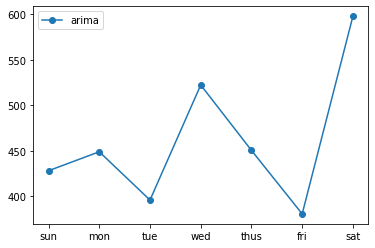

In [48]:
dataset = pd.read_csv("household_power_consumption_days.csv",header=0,infer_datetime_format=True, parse_dates=["datetime"], index_col=['datetime'])

# split into train test
train, test = split_dataset(dataset.values)

#define the names and the sunctions for this model we wish to evaluate
models = dict()
models['arima'] = arima_forecast

# evluate the model
days = ['sun','mon','tue','wed','thus','fri','sat']

for name,func in models.items():
    score,scores = evaluate_model(func,train,test)
    
    summerize_scores(name,score,scores)
    
    plt.plot(days,scores,marker='o',label=name)

plt.legend()

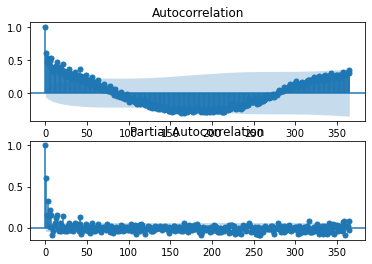

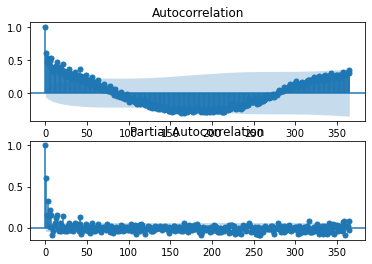

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#plots
plt.figure()
lags =365

# ACF
axis = plt.subplot(2,1,1)
plot_acf(series, ax=axis, lags=lags)

axis = plt.subplot(2,1,2)

plot_pacf(series,ax=axis,lags =lags)
